# Predict Survival on Titanic  

In this notebook, I will fit and try to predict survival in the Titanic using the Titanic dataset which is available on [kaggle](https://www.kaggle.com/c/titanic/data).

In [9]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import os

%matplotlib inline

## Load dataset

In [3]:
def load_dataset(path = 'titanic'):
    dataset_path = os.path.join(path, 'train.csv')
    return pd.read_csv(dataset_path)

In [4]:
df = load_dataset()

*Since test.csv does not have labels column on it, I won't be using it. gender_submission.csv is an example with dummy values, so it will be ignored as well.*

## Data Structure

In [6]:
# Print first few rows of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Description of data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Some columns like *Age*, *Cabin*, *Embarked* have some missing data. Also, notice that there are 5 columns that carry string data.

In [8]:
# Description of Numerical data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


I'll check whether string columns contain categorical values. *Name* obviously is not categorical and *sex* is. They would be ignored here. I'll use value counts to check each column.

In [12]:
df['Ticket'].value_counts()

347082        7
CA. 2343      7
1601          7
3101295       6
347088        6
             ..
2693          1
28425         1
2667          1
350047        1
A/5. 10482    1
Name: Ticket, Length: 681, dtype: int64

In [13]:
df['Cabin'].value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
F2             3
F33            3
              ..
A24            1
D46            1
E63            1
C87            1
D37            1
Name: Cabin, Length: 147, dtype: int64

In [14]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

*Embarked* is a categorical column. *Ticket* and *Cabin* are not much categorical. Since *Cabin* has a lot of missing values, I will remove that from the dataset later on.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f36c7371550>,
      dtype=object)

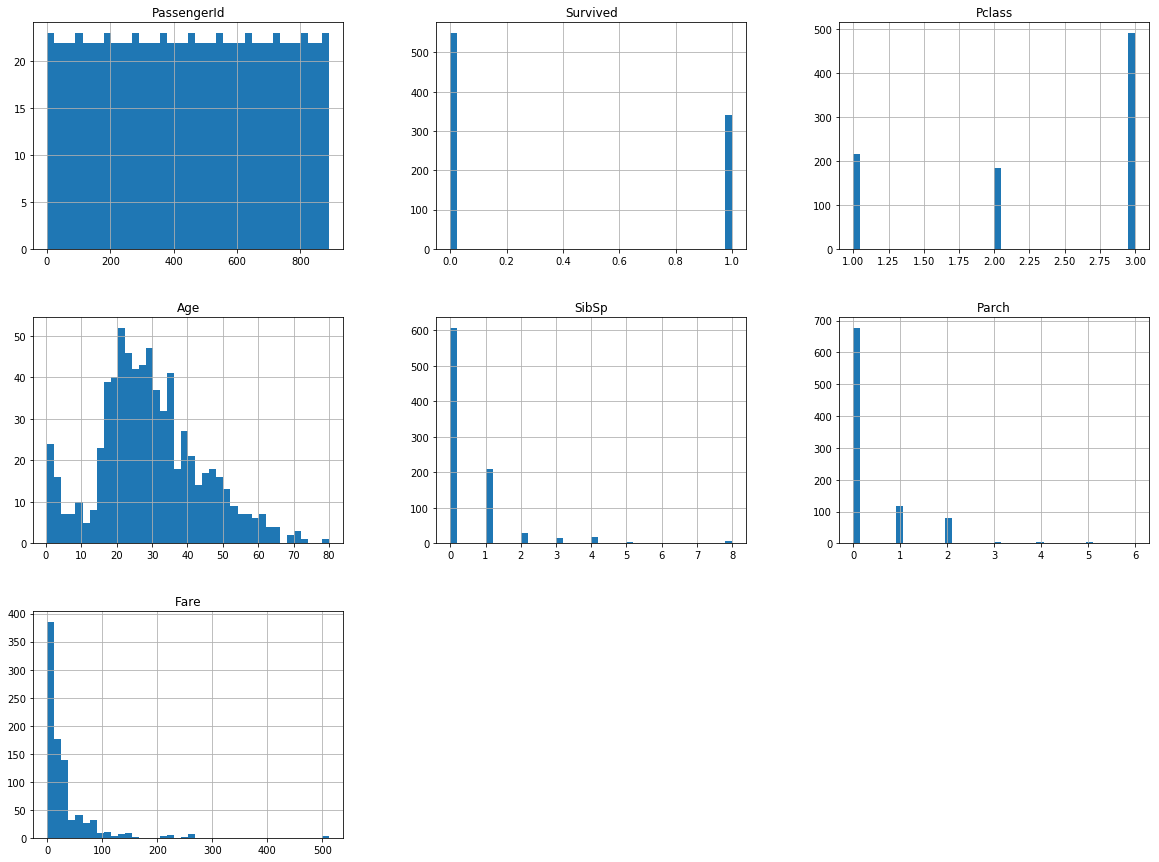

In [17]:
# A histogram to understand numerical attributes better
df.hist(bins = 40, figsize = (20, 15))

From the histograms above, it is clear that all of these attributes are on different scales and *Age* and *Fare* extend farther to the right of the median.